In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [45]:
data=pd.read_csv(r"NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [46]:
data.shape

(34, 3)

In [47]:
data.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [48]:
data.drop('Newspaper',axis=1).corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


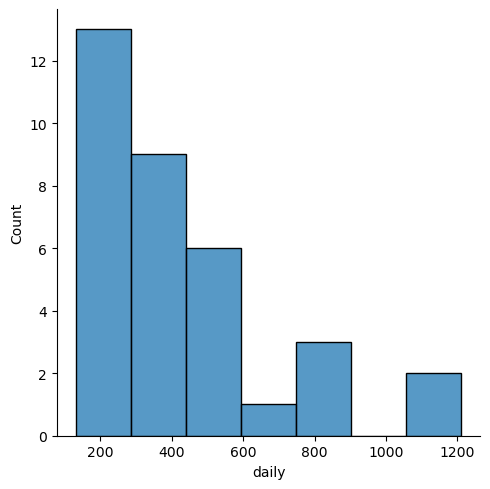

In [49]:
sns.displot(data['daily'])


In [50]:
import statsmodels.formula.api as smf
model=smf.ols("sunday~daily",data=data).fit()

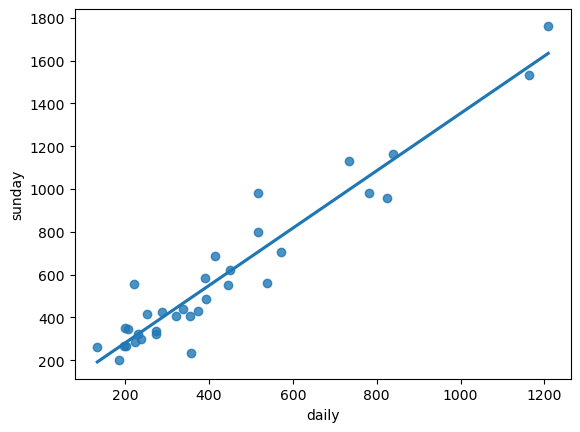

In [51]:
sns.regplot(x="daily",y="sunday",data=data,ci=None);

In [52]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [53]:
daily=300

In [54]:
sunday=1.33*daily + 13.833
sunday

412.833

In [55]:
print(model.tvalues, '\n',model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [56]:
#r-squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

# PREDICT  FOR  NEW  DATA  POINT

In [57]:
newdata=pd.Series([1000,3000])
newdata

0    1000
1    3000
dtype: int64

In [58]:
data_pred=pd.DataFrame(newdata,columns=['daily'])
data_pred

,daily
0,1000
1,3000


In [59]:
model.predict(data_pred)

0    1353.550388
1    4032.979903
dtype: float64

In [60]:
data_pred['sunday']=model.predict(data_pred)


In [61]:
data_pred

,daily,sunday
0,1000,1353.550388
1,3000,4032.979903


In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lr=LinearRegression()
lr.fit(data[['daily']],data['sunday'])

LinearRegression()

In [66]:
lr.predict(data_pred[['daily']])

array([1353.55038759, 4032.97990296])

In [67]:
lr.coef_

array([1.33971476])

In [68]:
lr.intercept_

13.835629909636282